<a href="https://www.kaggle.com/code/ameau01/uber-fare-prediction?scriptVersionId=237314489" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CSCA-5622: Supervised Machine Learning - Final Project #


<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/Uber1.jpg" alt="." width="300">

## Uber Dynamic Fare Prediction ##
### - Adapting Supervised Machine Learning Model on Time Series Data ###
* Author: Alexander Meau  
* Email: alme9155@colorado.edu  
* GitHub: [https://github.com/alme9155/csca-5622-final-project/tree/main](https://github.com/alme9155/csca-5622-final-project/tree/main)  
---

## I. Project Description ##

This is the final project of CSCA-5622: Supervised Learning Algorithms in Machine Learning.

### Topic: **Uber Dynamic Fare Prediction - Adapting Supervised Machine Learning Model on Time Series Data.** ###

### I.i. Objective: ####

This project aims to predict Uber fares dynamically, adjusting rush hour periods and days of the week. By using adapting supervised learning methods on the Uber fare dataset, this Project analysis takes a cross-sectional approach to fare prediction using auto-regression on a time series dataset.

### I.ii. Background ####

What is a **time series** dataset?

**Time series data** is a sequence of data points collected over time, where each point is associated with a specific timestamp. The key characteristic is that the order of the data points matters, as they are recorded sequentially at particular intervals (e.g., hourly, daily, monthly). Common examples include stock prices, and weather measurements. Using regression on time series data often involves modeling how past events or patterns to predict future event occurrences.

What is the concept of **auto-regression (AR)**?
**Autoregression (AR)** is a time series modeling technique where the current value of a variable is predicted based on its **own past values**. It assumes that past observations have a **linear influence** on the present. An AR model of order *p* (AR(*p*)) uses the previous *p* time steps as predictors. It’s best suited for **stationary** data with consistent patterns over time.


### I.iii. Project Significance ###

This project aims to answer this question: 

**Can we predict Uber fares on weekdays based on the fare from the same time in the previous week? How accurate would such a prediction be?** 

As a frequent Uber rider, I’ve noticed that weekday fares often follow a predictable pattern. While weekend fares tend to fluctuate due to various factors, weekday travel is generally structured around typical rush hours when people commute to and from work. If this intuition is correct, could we use supervised learning to predict Uber fares? Is there an underlying trend in weekday fare behavior? This problem is particularly interesting because future fares may be related to past fares—suggesting a potential autoregressive relationship across time, making it well-suited for time-series analysis.


### I.iv. Machine Learning algorithm used in this project: ###

* Linear Regression
* Random Forest
* Gradient Boosting

### Dataset: ###

"Uber Fares Dataset" from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset).


## II. Dataset Description: ##

The Uber Fares Dataset from [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset) contains over 200,000 records of uber trip data collected from Uber API. Each row in the Uber fares dataset captures details such as the fare amount, pickup and dropoff times, locations, and passenger count.

### Columns: ###

- **key** : a unique identifier for each trip
- **fare_amount** : the cost of each trip in usd
- **pickup_datetime** : date and time when the meter was engaged
- **passenger_count** : the number of passengers in the vehicle (driver entered value)
- **pickup_longitude** : the longitude where the meter was engaged
- **pickup_latitude** : the latitude where the meter was engaged
- **dropoff_longitude** : the longitude where the meter was disengaged
- **dropoff_latitude** : the latitude where the meter was disengaged


## III. Exploratory Data Analysis ##

### III.i.Loading the data from Kaggle ###
This notebook require internet connection to access dataset from the kaggle dataset.

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# loading the data
data = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')
data = data.drop("Unnamed: 0", axis=1)
data = data.drop("key", axis=1)


print(f"Data loaded successfully.")

/kaggle/input/uber-fares-dataset/uber.csv
Data loaded successfully.


### III.ii.Exploring and understanding the data ###

Perform a thorough exploratory data analysis (EDA) using appropriate visualizations, and then summarize the key findings to formulate project strategy.

In [27]:
# EDA process
# 1. load the dataset
# 2. inspect the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

print(f"\nDataSet Info:")
print("--------------------------")
print(data.info())
print(f"\nDataSet Shape:")
print("--------------------------")
print(f"Data Shape: {data.shape[0]} Rows x {data.shape[1]} Columns")
# print(data.shape)

print(f"\nFirst five rows of training data:")
print("--------------------------") 
df_head = data.head(5)
display(df_head)

print(f"\nNaN values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nINF, -INF values in dataset:")
print("--------------------------")    
print("NaN values in dataset:")
print(data.isna().sum())

print(f"\nNull values in non-numeric columns:")
print("--------------------------")    
print(data.select_dtypes(include='object').columns.isnull().sum())

numeric_columns = data.select_dtypes(exclude='object').columns
zero_counts = (data[numeric_columns] == 0).sum().sort_values(ascending=False)
print("\nNumber of zeros in each numeric column:")
print("----------------------------------------")
df_zeros = pd.DataFrame({
    'Column Name': zero_counts.index,
    'Number of Zeros': zero_counts.values
})
df_zeros['% of Zeros Rows'] = ((df_zeros['Number of Zeros'] / data.shape[0]) * 100).round(2).astype(str)+"%"
display(df_zeros)

# find the range of dataset based on pickup datetime
print("\nRange of ride date/time in uber fare dataset:")
print("----------------------------------------")
min_datetime = pd.to_datetime(data['pickup_datetime'].min())
max_datetime = pd.to_datetime(data['pickup_datetime'].max())

print("Earliest pickup_datetime:", min_datetime)
print("Latest pickup_datetime:", max_datetime)
print("Datetime range:", max_datetime - min_datetime)


DataSet Info:
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB
None

DataSet Shape:
--------------------------
Data Shape: 200000 Rows x 7 Columns

First five rows of training data:
--------------------------


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5



NaN values in dataset:
--------------------------
NaN values in dataset:
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

INF, -INF values in dataset:
--------------------------
NaN values in dataset:
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Null values in non-numeric columns:
--------------------------
0

Number of zeros in each numeric column:
----------------------------------------


,Column Name,Number of Zeros,% of Zeros Rows
0,pickup_longitude,3786,1.89%
1,pickup_latitude,3782,1.89%
2,dropoff_longitude,3764,1.88%
3,dropoff_latitude,3758,1.88%
4,passenger_count,709,0.35%
5,fare_amount,5,0.0%



Range of ride date/time in uber fare dataset:
----------------------------------------
Earliest pickup_datetime: 2009-01-01 01:15:22+00:00
Latest pickup_datetime: 2015-06-30 23:40:39+00:00
Datetime range: 2371 days 22:25:17


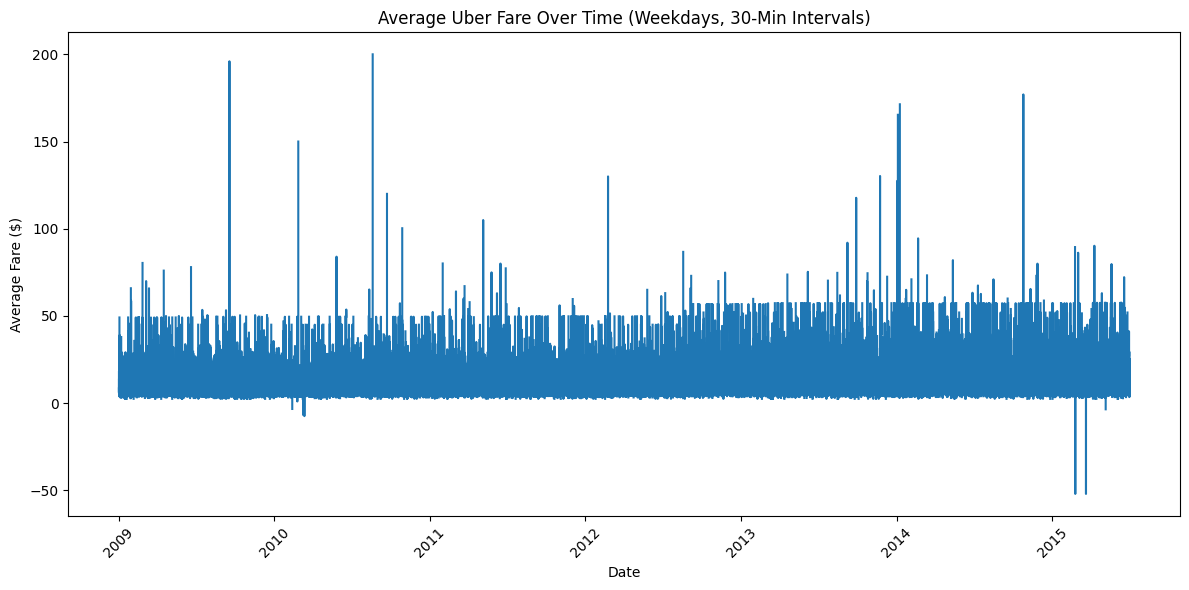

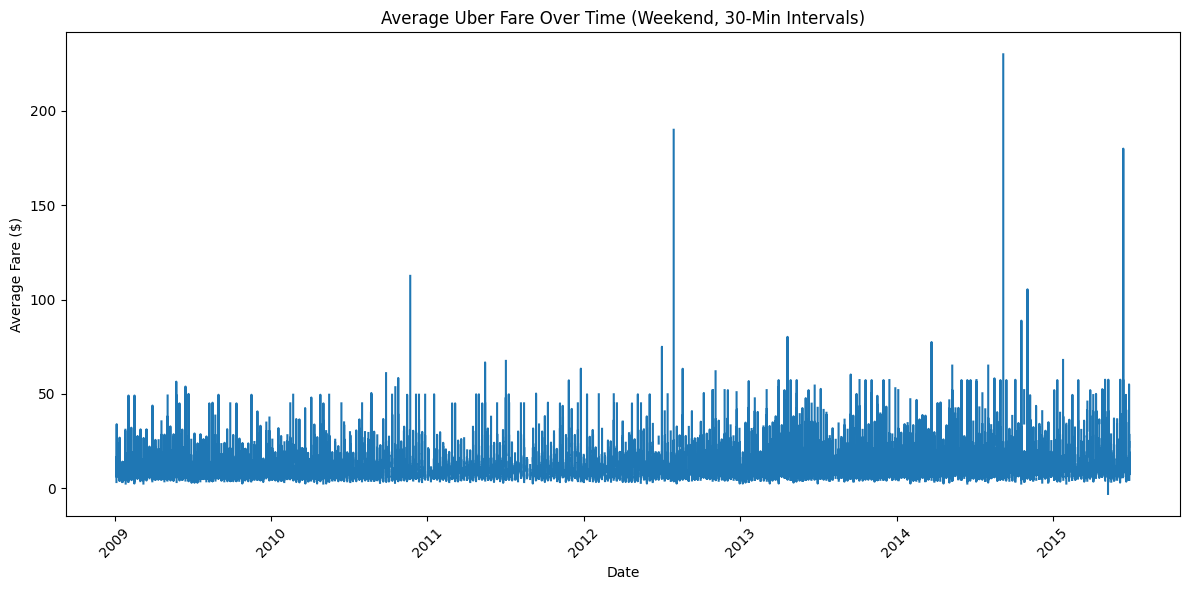

In [29]:
# Plot average uber fare on weekdays
import warnings
# Suppress FutureWarning from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data_weekday = data[data['pickup_datetime'].dt.dayofweek < 5]
data_agg = data_weekday.groupby(pd.Grouper(key='pickup_datetime', freq='30min'))['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_agg['pickup_datetime'], data_agg['fare_amount'])
plt.title('Average Uber Fare Over Time (Weekdays, 30-Min Intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data_weekend = data[data['pickup_datetime'].dt.dayofweek > 5]

data_agg = data_weekend.groupby(pd.Grouper(key='pickup_datetime', freq='30min'))['fare_amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(data_agg['pickup_datetime'], data_agg['fare_amount'])
plt.title('Average Uber Fare Over Time (Weekend, 30-Min Intervals)')
plt.xlabel('Date')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

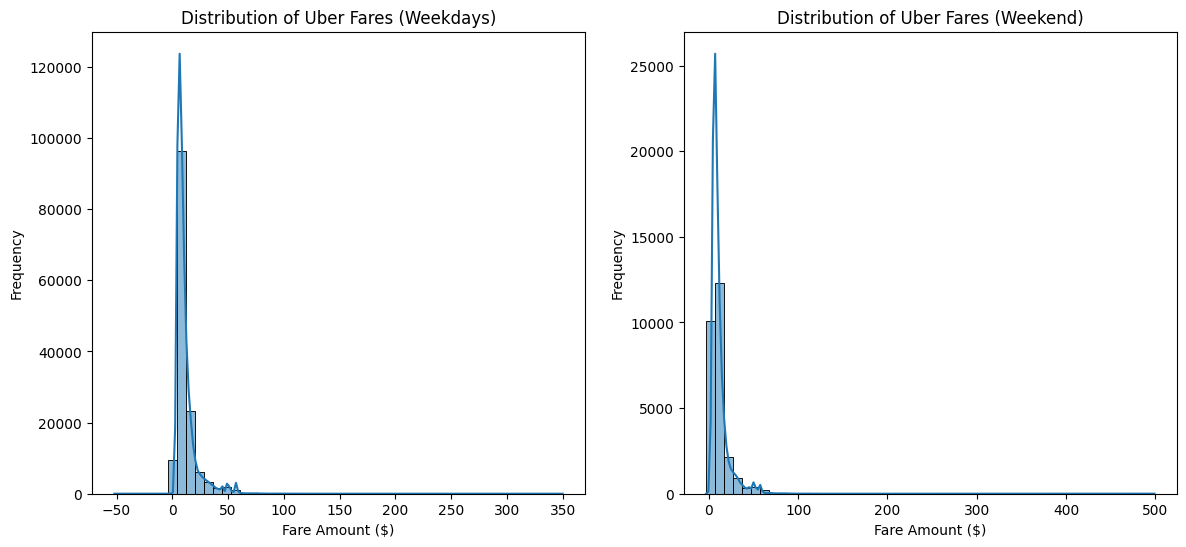

In [30]:
# Plot of distribution of uber fares on weekdays (Mon-Fri)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data_weekday['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares (Weekdays)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

# Plot of distribution of uber fares on weekends (Sat-Sun)
plt.subplot(1, 2, 2)
sns.histplot(data_weekend['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Uber Fares (Weekend)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()

### III.iii. EDA summary and Modelling Stretegy ###

* **Data Source**: Kaggle
* **Data Collection** : Data collected from Uber public API
* **Data Size** :This dataset has 200,000 rows and 6 columns.
* **Attributes** : Attributes can be grouped into 4 categories:

   *  **Metadata** : key
   *  **Trip distance** : pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
   *  **Passenger information** : passenger_count
   *  **Fare information** : passenger count

* **Data Quality**:

   *  1 rows NaN in column: dropoff_longitude, dropoff_latitude
   *  No NaN in fare_amount, pickup_datetime, passenger_count
   *  About 2% of records has zero values in pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
   *  No Inf or -Inf values

* **Data Distribution**:

   *  There are fare spike over 200 dollars during rush hours
   *  There are few entries with negative fare amount or zero passengers.
   *  Average fares received for driving 30 mins: 0 - 50 dollars
   *  Fares earned during weekday is more consistent than weekends (less spike of fares received)
   *  Frequency: The majority of fares are low (e.g., ~120,000 rides below 10 dollars)
   *  Fare frequency dropping sharply as fares increase.
   *  Typical of transportation fare data where short, low-cost rides dominate.



## IV. Data Clearning and Pre-Processing ##

### IV.i. Data Clearning ###

* Data Cleaning needs:
   * Need to drop invalid distance records with Nan, and rows with zero values
   * Need to drop all invalid fare records with negative fares.
   * Need to remove outliner during surge hours (clip fare above 100 dollars)
   * Passenger count is irrelevant for the fare prediction, zero values will be replace with median.

In [31]:
# Cleaning invalid entries
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data = data[data['fare_amount'] > 0]
data['fare_amount'] = data['fare_amount'].clip(lower=2, upper=100)
data = data[(data['pickup_longitude'] != 0) & (data['pickup_latitude'] != 0)]
data = data[(data['dropoff_longitude'] != 0) & (data['dropoff_latitude'] != 0)]
data['passenger_count'] = data['passenger_count'].replace(0, data['passenger_count'].median())

print(f"Data cleaning complete.")

Data cleaning complete.


### IV.ii. Distance Pre-Processing ###

* Distance Pre-processing needs:
   * Need to calculate the distance traveled from the longtitude and latitude coordinates for fare predictions.
   * Standard method to calculate distance travelled between two coordinates is the haversine formula
   * Ref: [https://en.wikipedia.org/wiki/Haversine_formula](https://en.wikipedia.org/wiki/Haversine_formula)


In [32]:
# calculate distance in miles
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.square(np.sin(dlat / 2.0)) + np.cos(lat1) * np.cos(lat2) * np.square(np.sin(dlon / 2.0))
    c = 2 * np.arcsin(np.sqrt(a))    
    r = 3958.8  # Radius of Earth in miles
    return c * r

# add new column distance
data['distance'] = haversine(
    data['pickup_latitude'], data['pickup_longitude'],
    data['dropoff_latitude'], data['dropoff_longitude']
)

print(f"Distance pre-processing complete.")

Distance pre-processing complete.


### IV.iii. Date Pre-Processing  ###

* Date Pre-processing needs:
   * In predict uber fares based on season and day of the week, we need to derive date features to enrich the dataset.
     
* Pre-Processing strategy:
   * The Uber fare dataset contains roughly six years of fare information.
   * It is adequate for studying how prices fluctuate across different seasons.

We can derive the following attributes based on "pickup_datetime":
   * **trip_hour** : hour when the trip begins (24 hour clock)
   * **trip_day_of_week**: 0=Monday, 4=Friday, 6=Sunday
   * **trip_month** : 1=January, ... 12=Decembber
   * **trip_year** : 4 digit year, such as 1994
   * **trip_season** : Winter (Dec-Feb), Spring (Mar-May), Summer (Jun-Aug), Fall (Sep- Nov)
   * **trip_season_num** : 0=(Winter), 1=Spring, 2=Summer, 3=Fall
   * **is_rush_hour**: 0-No, 1-Yes (7:00am -9:59am) or (4:00pm -6:59pm)


In [33]:
# Derive columns from pickup_datetime

data['pickup_datetime_dt'] = pd.to_datetime(data['pickup_datetime'])
data['trip_hour'] = data['pickup_datetime_dt'].dt.hour
data['trip_day_of_week'] = data['pickup_datetime_dt'].dt.dayofweek  # 0=Monday, 4=Friday
data['trip_month'] = data['pickup_datetime_dt'].dt.month  # 1–12
data['trip_year'] = data['pickup_datetime_dt'].dt.year  # 2009–2015
data['is_rush_hour'] = data['trip_hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
data['trip_season'] = data['trip_month'].apply(get_season)

def get_season_num(month):
    if month in [12, 1, 2]:
        return 0
    elif month in [3, 4, 5]:
        return 1
    elif month in [6, 7, 8]:
        return 2
    else:
        return 3
data['trip_season_num'] = data['trip_month'].apply(get_season_num)


data = data.drop('pickup_datetime_dt', axis=1)
print(f"Derived Datetime columns added.")



Derived Datetime columns added.


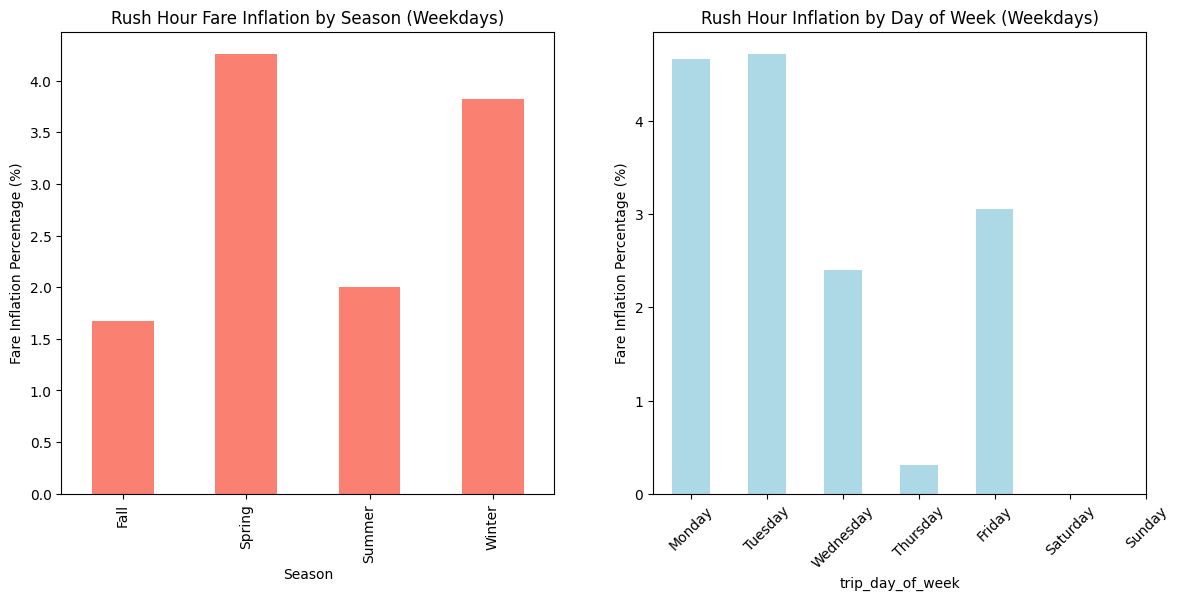

In [34]:
# Reduce dataset to weekday only.
data = data[data['trip_day_of_week'] <5]

# Plot Rush Hour Fare Inflation by Season
rush_inflation = data.groupby(['trip_season', 'is_rush_hour'])['fare_amount'].mean().unstack()
rush_inflation['inflation_percentage'] = ((rush_inflation[0] - rush_inflation[1]) / rush_inflation[0] * 100).round(2)
# print("Rush Hour Inflation by Season (%):")
# print(rush_inflation)


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
rush_inflation['inflation_percentage'].plot(kind='bar', color='salmon')
plt.title('Rush Hour Fare Inflation by Season (Weekdays)')
plt.xlabel('Season')
plt.ylabel('Fare Inflation Percentage (%)')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rush_inflation_day = data.groupby(['trip_day_of_week', 'is_rush_hour'])['fare_amount'].mean().unstack()
rush_inflation_day['inflation_percentage'] = ((rush_inflation_day[0] - rush_inflation_day[1]) / rush_inflation_day[0] * 100).round(2)
# print("Rush Hour Fare Inflation by Day of Week (%):")
# print(rush_inflation_day)

plt.subplot(1, 2, 2)
rush_inflation_day['inflation_percentage'].plot(kind='bar', color='lightblue')
plt.title('Rush Hour Inflation by Day of Week (Weekdays)')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=45)  # Set x-axis labels to day names
plt.ylabel('Fare Inflation Percentage (%)')
plt.show()


### IV.iii. Fare Pre-Processing and Modeling Strategy ###

* Data Pre-processing needs:
   * The presence of spikes, negative values indicates non-stationarity.
   * Since the fare data is skewed, log transformation is required before applying machine learning models.
   * After fare are log transformed, need to calculate the fare of previous day

* Pre-Processing strategy:
   * Since Weekends fare data exhibit greater variability, we should reduce the dataset to weekday only to have more consistent fare prediction.
   * Focusing on weekdays reduce skewness benefiting linear regression, but might not impact on Random Forest, or gradient bossting.
   * The decision of focusing on weekday fares reduce the data set by 15%
   * feature engineering is required to introduce 24 hours to capture temporal patterns

* Pre-Processing strategy:
Calculating a **lag column** in your Uber fare exercise allows you to capture **temporal dependencies** in the data—such as how current fare levels may be influenced by fares at the same time **one week earlier**. This is especially important for modeling patterns like **weekly seasonality**, rush hours, or recurring demand cycles. Including lag features turns time-series data into a format usable by classical supervised learning models that assume independent rows, enabling them to learn from **past values as predictors** for current or future fares.

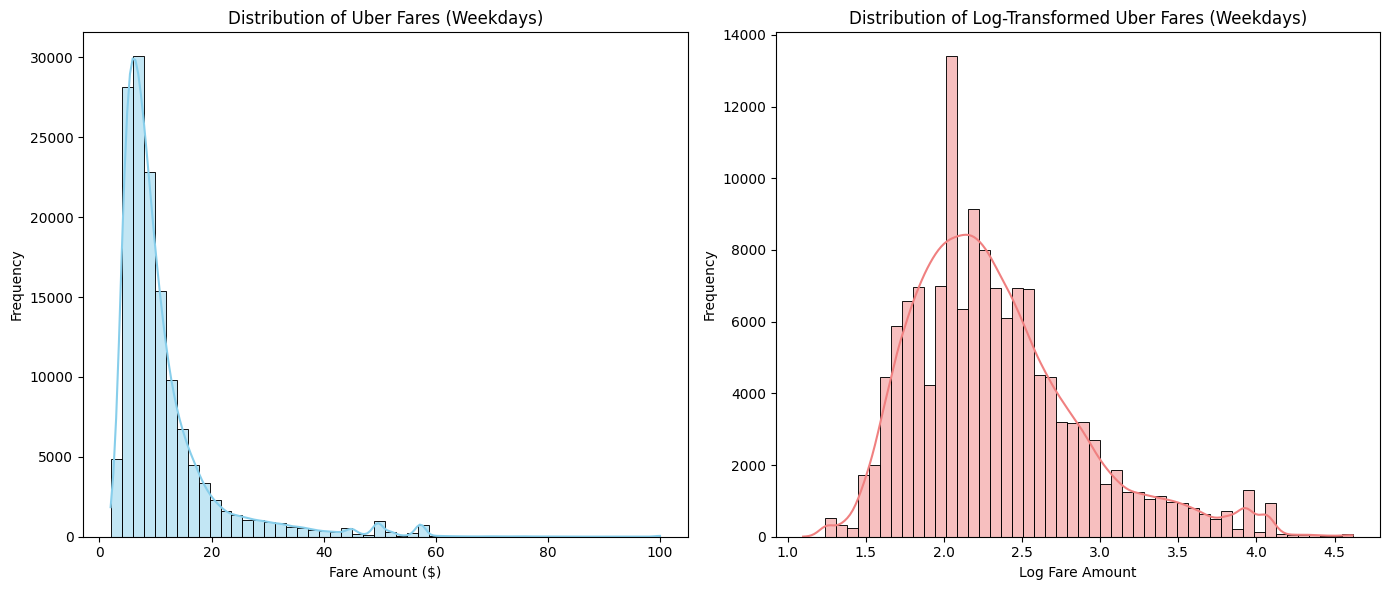

In [35]:
# reduce dataset to weekday only.
data = data[data['pickup_datetime'].dt.dayofweek < 5]

# Log transform fare_amount
if 'log_fare_amount' in data:
    data = data.drop('log_fare_amount', axis=1)
data['log_fare_amount'] = np.log1p(data['fare_amount'])

# plot log fare vs uber fares
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Uber Fares (Weekdays)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['log_fare_amount'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Log-Transformed Uber Fares (Weekdays)')
plt.xlabel('Log Fare Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [36]:
#. calculate lagged fare from previous week with 30 mins windows
if 'lagged_fare_by_week' in data:
    data = data.drop('lagged_fare_by_week', axis=1)
global_mean = data['log_fare_amount'].mean()
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['time_window'] = data['pickup_datetime'].dt.round('30min')
window_means = data.groupby('time_window')['log_fare_amount'].mean().reset_index()
data['lagged_time_week'] = data['time_window'] - pd.Timedelta(hours=168)

# Merge with window_means to get lagged fares
data = data.merge(
    window_means.rename(columns={'time_window': 'lagged_time_week', 'log_fare_amount': 'lagged_fare_by_week'}),
    on='lagged_time_week',
    how='left'
)


# Fill missing values with hourly means
hourly_means_week = data.groupby('trip_hour')['lagged_fare_by_week'].mean()
hourly_means_week = hourly_means_week.fillna(global_mean)

data['lagged_fare_by_week'] = data.apply(
    lambda row: hourly_means_week[row['trip_hour']] if pd.isna(row['lagged_fare_by_week']) else row['lagged_fare_by_week'],
    axis=1
)

data['lagged_fare_by_week'] = data['lagged_fare_by_week'].fillna(global_mean)
data['lagged_fare_by_week'] = data['lagged_fare_by_week'].replace([np.inf, -np.inf], np.nan)

data = data.dropna(subset=['log_fare_amount', 'lagged_fare_by_week', 'trip_hour'])
data = data[data['lagged_fare_by_week'] > 0]
data = data.drop(['time_window', 'lagged_time_week'], axis=1)

print("Lagged fare preprocessing complete.")

Lagged fare preprocessing complete.


### IV. Feature Engineering ###

* Feature selection strategy:
   * This project aim to compare the prediction results using both linear parametric modeling, as well as non-linear ones.
   * Mututal information measures dependency two variable capturing both linear and non-linear relationship.
   * Feature selection based on pairwise information scores would be more suitable for this project.
   * Selection Threshold: mutual information score > 0.001


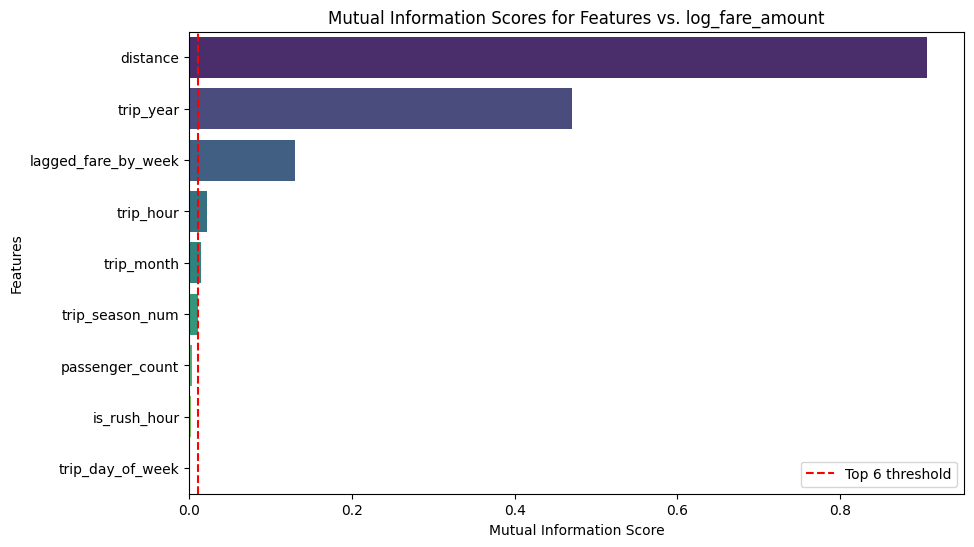

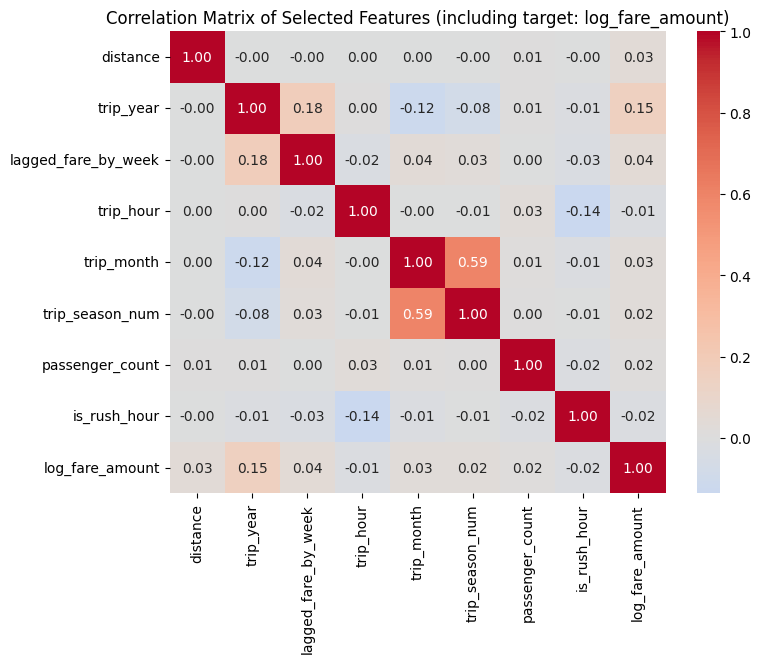

In [54]:
from sklearn.feature_selection import mutual_info_regression
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Feature candidates
feature_candidates = [
    'passenger_count', 'distance', 'trip_hour', 'trip_day_of_week',
    'trip_month', 'trip_year', 'is_rush_hour', 'trip_season_num',
    'lagged_fare_by_week'
]

# select feature with score > 0.01
data_clean = data[feature_candidates + ['log_fare_amount']].dropna()
mutual_info = mutual_info_regression(data_clean[feature_candidates], data_clean['log_fare_amount'], random_state=42)
mi_series = pd.Series(mutual_info, index=feature_candidates).sort_values(ascending=False)
selected_features = mi_series[mi_series > 0.001].index.tolist()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette='viridis')
plt.axvline(x=mi_series.iloc[k-1], color='red', linestyle='--', label=f'Top {k} threshold')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Features vs. log_fare_amount')
plt.legend()
plt.show()

# Correlation matrix 
corr_matrix_selected = data_clean[selected_features + ['log_fare_amount']].corr()
corr_matrix_selected = corr_matrix_selected.fillna(0)  # Fill NaN values to avoid plotting issue
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_selected, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Selected Features (including target: log_fare_amount)")
plt.show()

### IV.i. Conclusion for Feature Engineering ###

* Using threshold > 0.01, six features are selected for modeling.
   * distance', 'trip_year', 'lagged_fare_by_week', 'trip_hour', 'trip_month', 'trip_season_num'

* Features Analysis:
   * **distance**: (Score: 0.907) As expected, distance is the most predictive feature strongly tied to uber fare. 
   * **trip_year**: (Score: 0.471): Fare increases over years due to inflation or policy changes.
   * **lagged_fare_by_week**: (Score: 0.129): This suggests weekly pattern is consistent on the same weekday of the week.
   * **trip_hour**, **trip_month**, **trip_season_num**: All three features scores relatively weaker score between 0.01 ~0.0.2.
   * This suggeest hour, months and season might have some affect to fare prediction, but the relationship may not be linear.
 

## V. Parametric Modeling with Linear Regression ##
Key Steps:

* i. Feature selection
* ii. Model Training with smear correction
* iii. Model Prediction 
* iii. Model Evaluation

In [59]:
from sklearn.model_selection import TimeSeriesSplit

# Use selected feature for modeling
X = data[selected_features]
y = data['log_fare_amount']
data = data.sort_values(by='pickup_datetime')
valid_rows = X.notna().all(axis=1) & y.notna()
X = X[valid_rows]
y = y[valid_rows]

# Get the first fold's train and test indices without a loop
train_index, test_index = next(TimeSeriesSplit(n_splits=5).split(X))
X_train = X.iloc[train_index]
X_test = X.iloc[test_index]
y_train = y.iloc[train_index]
y_test = y.iloc[test_index]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print("Complete splitting data into train and test set.")


Training set size: 23407
Test set size: 23405
Completp splitting data into train and test set.


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_evaluation_results = {}

# 
# Common Evaluation method to compare predicted fare vs true fare
# group results into rush hours vs non-rush hour 
def model_evaluation(y_true, y_pred, X_test, feature_name='is_rush_hour', model_name=''):
    print(f"\nOverall MAE {model_name}= {mean_absolute_error(y_true, y_pred):.2f}, RMSE = {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"\nPerformance of {model_name} by {feature_name}:")

    # Evaluate by feature subgroup
    for val in sorted(X_test[feature_name].unique()):
        idx = X_test[X_test[feature_name] == val].index
        if len(idx) == 0:
            print(f"No data for {feature_name} = {val}")
            continue
        mae = mean_absolute_error(y_true.loc[idx], y_pred.loc[idx])
        rmse = np.sqrt(mean_squared_error(y_true.loc[idx], y_pred.loc[idx]))
        print(f"{feature_name} = {val} — MAE = {mae:.2f}, RMSE = {rmse:.2f}")

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
    colors = {0: 'blue', 1: 'red'}  
    labels = {0: 'Non-Rush Hour', 1: 'Rush Hour'}
    for ax, val in zip(axes, sorted(X_test[feature_name].unique())):
        idx = X_test[X_test[feature_name] == val].index
        if len(idx) == 0:
            continue
        ax.scatter(y_true.loc[idx], y_pred.loc[idx], alpha=0.4, s=10, color=colors[val], label=labels[val])
        ax.plot([y_true.min(), y_true.max()],
                [y_true.min(), y_true.max()],
                'k--', lw=2)
        ax.set_title(f"{feature_name} = {val}")
        ax.set_xlabel("True Fare ($)")
        ax.set_ylabel("Predicted Fare ($)")
        ax.grid(True)
        ax.legend()

    plt.suptitle(f"True vs Predicted Fare by {feature_name} ({model_name})", y=1.05)
    plt.tight_layout()
    plt.show()
    return (mae, rmse)

print('Evaluation method updated..')

Evaluation method updated..



Overall MAE linear regression= 6.96, RMSE = 11.05

Performance of linear regression by is_rush_hour:
is_rush_hour = 0 — MAE = 7.05, RMSE = 11.14
is_rush_hour = 1 — MAE = 6.74, RMSE = 10.85


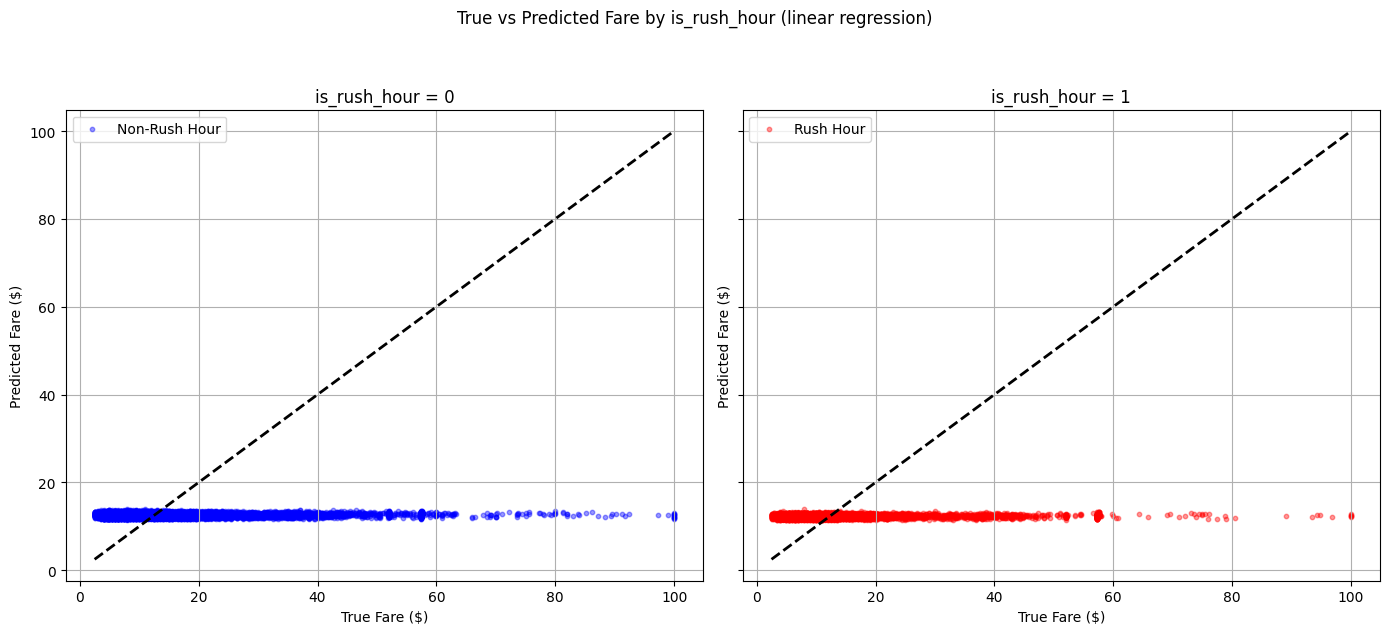

Feature Importances Values with Linear Regression Model:


,Feature,Importance
0,distance,0.878364
1,trip_year,0.066036
2,trip_hour,0.025500
3,trip_month,0.013573
4,trip_season_num,0.007303
5,passenger_count,0.003737
6,is_rush_hour,0.003342
7,lagged_fare_by_week,0.002145


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred_log = model.predict(X_train)
residuals = y_train - y_train_pred_log
smearing_factor = np.mean(np.expm1(residuals)) + 1

# Predict on test 
y_test_pred_log = model.predict(X_test)
y_test_pred = np.expm1(y_test_pred_log) * smearing_factor
y_test_pred = pd.Series(y_test_pred, index=y_test.index)
y_test_true = np.expm1(y_test)

# Evaluate
mae_lr, rmse_lr = model_evaluation(
    y_true=y_test_true,
    y_pred=y_test_pred,
    X_test=X_test,
    feature_name='is_rush_hour',
    model_name='linear regression'
)
model_evaluation_results['Linear Regression'] = {'MAE': mae_lr, 'RMSE': rmse_lr}

# Display feature importance Table
lr_importances_df = (
    pd.Series(best_xgb.feature_importances_, index=selected_features)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'Feature', 0: 'Importance'})
)

print("Feature Importances Values with Linear Regression Model:")
display(lr_importances_df)



## VI. Non-Parametric Modeling with Gradient Boosting (XGBoost) ##
Key Steps:

* i. Feature selection
* ii. Model Training with hyper-parameter tunning
* iii. Model Prediction 
* iv. Model Evaluation

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

Overall MAE XGBoost= 2.31, RMSE = 4.48

Performance of XGBoost by is_rush_hour:
is_rush_hour = 0 — MAE = 2.28, RMSE = 4.52
is_rush_hour = 1 — MAE = 2.39, RMSE = 4.39


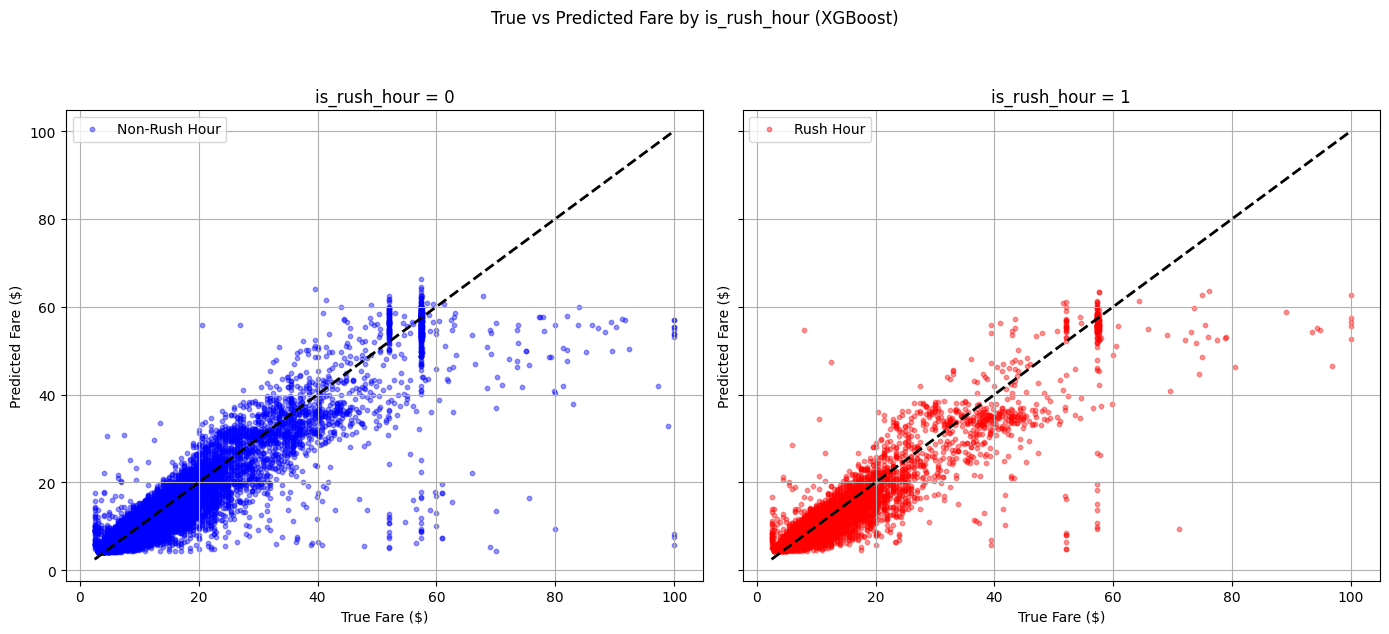

Feature Importances Values with XGBoost:


,Feature,Importance
0,distance,0.878364
1,trip_year,0.066036
2,trip_hour,0.025500
3,trip_month,0.013573
4,trip_season_num,0.007303
5,passenger_count,0.003737
6,is_rush_hour,0.003342
7,lagged_fare_by_week,0.002145


In [107]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(xgb, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

best_xgb = grid.best_estimator_
print("Best XGBoost Parameters:", grid.best_params_)

# Use best tuned model for prediction
y_test_pred_log = best_xgb.predict(X_test)
y_test_pred_xgb = np.expm1(y_test_pred_log)
y_test_pred_xgb = pd.Series(y_test_pred_xgb, index=y_test.index)
y_test_true = np.expm1(y_test)

# Evaluate
mae_xg, rmse_xg = model_evaluation(
    y_true=y_test_true,
    y_pred=y_test_pred_xgb,
    X_test=X_test,
    feature_name='is_rush_hour',
    model_name='XGBoost'
)
model_evaluation_results['XGBoost'] = {'MAE': mae_xg, 'RMSE': rmse_xg}

# Display feature importance Table
xgboost_importances_df = (
    pd.Series(best_xgb.feature_importances_, index=selected_features)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'Feature', 0: 'Importance'})
)

print("Feature Importances Values with XGBoost:")
display(xgboost_importances_df)



## VII. Non-Parametric Modeling with Random Forest ##
Key Steps:

* i. Feature selection
* ii. Model Training with hyper-parameter tunning
* iii. Model Prediction 
* iii. Model Evaluation

Best RF Parameters: {'n_estimators': 100, 'max_depth': 10}

Overall MAE Random Forest= 2.33, RMSE = 4.47

Performance of Random Forest by is_rush_hour:
is_rush_hour = 0 — MAE = 2.28, RMSE = 4.48
is_rush_hour = 1 — MAE = 2.43, RMSE = 4.43


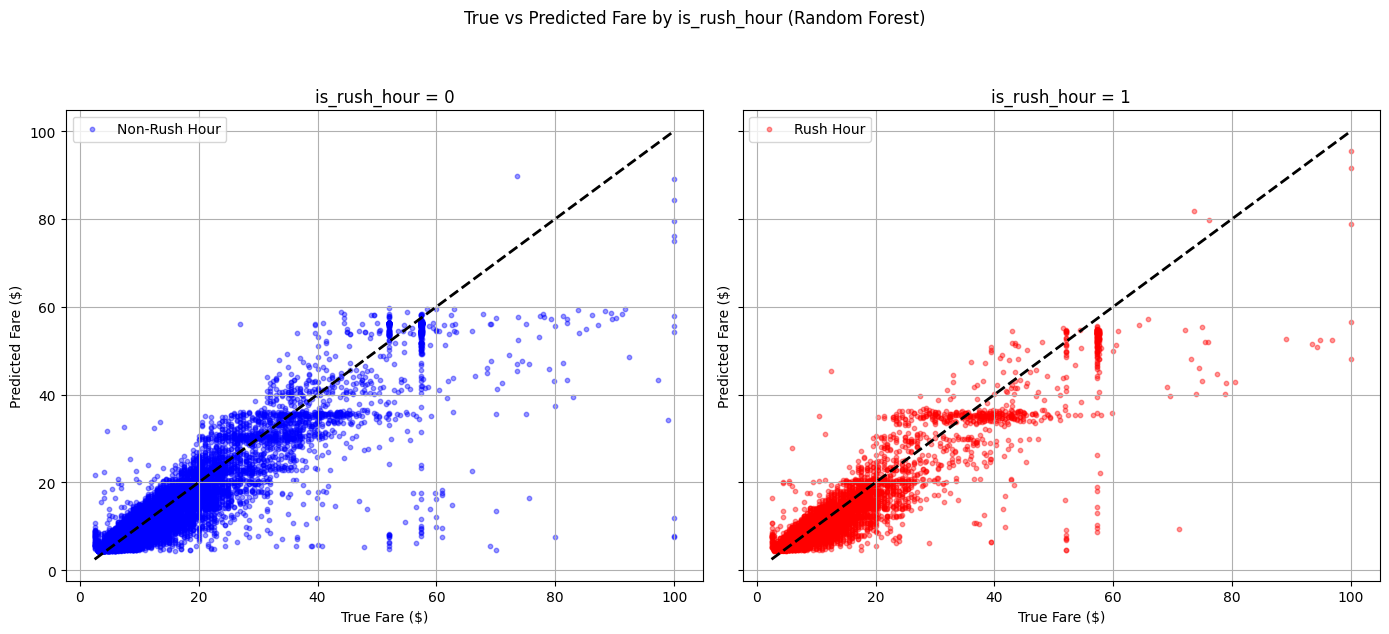

In [115]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10]
}

# hyper-parameter tuning
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=4,
    scoring='neg_mean_squared_error'
)
random_search.fit(X_train, y_train)

# Best model from grid search to make prediction
best_rf_model = random_search.best_estimator_
print(f"Best RF Parameters: {random_search.best_params_}")
y_test_pred_log = best_rf_model.predict(X_test)
y_test_pred_rf = np.expm1(y_test_pred_log)
y_test_pred_rf = pd.Series(y_test_pred_rf, index=y_test.index)
y_test_true = np.expm1(y_test)

# evaluate model
mae_rf, rmse_rf = model_evaluation(
    y_true=y_test_true,
    y_pred=y_test_pred_rf,
    X_test=X_test,
    feature_name='is_rush_hour',
    model_name='Random Forest'
)
model_evaluation_results['Random Forest'] = {'MAE': mae_rf, 'RMSE': rmse_rf}

# display feature importance
rf_importances_df = (
    pd.Series(best_rf_model.feature_importances_, index=selected_features)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'Feature', 0: 'Importance'})
)


## VIII. Result Analysis ##

Three supervised learning machine learning models were chosen to study the predict uber fares:

* Linear Regression (Parametric)
* Gradient Boost -XGBoost (Non-Parametric)
* Random Forest (Non-Parametric)

**Among the three methods, Gradient Boost model performed the best overall, (RMSE=4.39, MAE=2.39)**

**Linear Regression:**
* Performs poorly compared to the tree-based model.
* High RMSE indicates poor fit to high fare and edge cases.
* Linear regression assumes a linear relationship, which does not hold for surge price.
* Derived attributes such as "trip_hour" and "is_rush_hour" might have strong collinearity, which reduces effectiveness.

**Grandient Decent (XGBoost):**
* Best performer overall in both MAE and RMSE
* XGBoost likely benefitted from better handling of non-linear patterns and handling of weak signals.
* It works very well with imbalanced dataset.

**Random Forest:**
* Random Forest performs very close to XGBoost.
* It is easy to tune than XGBoost and faster to train
* Interpretable using feature importance.


,MAE,RMSE
XGBoost,2.39,4.39
Linear Regression,6.74,10.85
Random Forest,2.43,4.43


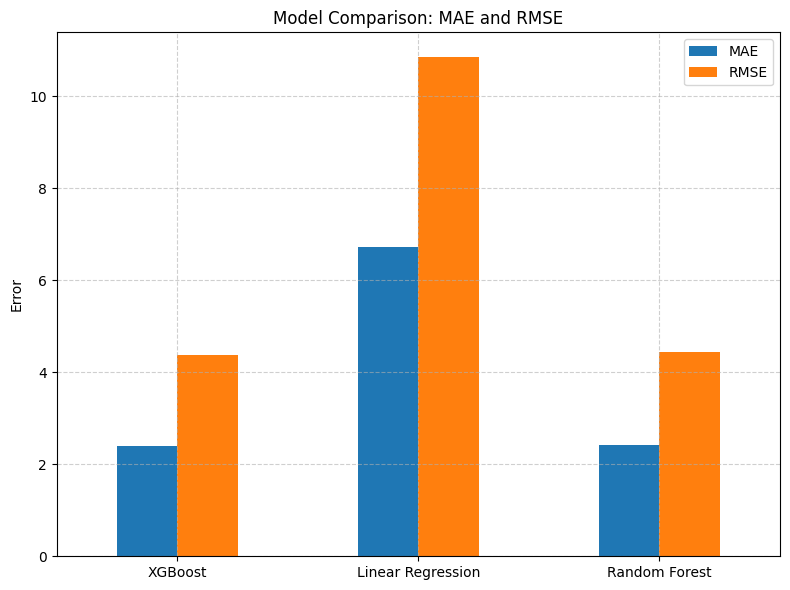

In [116]:
# Convert to DataFrame
results_df = pd.DataFrame(model_evaluation_results).T 
display(results_df.style.format({'MAE': '{:.2f}', 'RMSE': '{:.2f}'}))

# Plot
results_df.plot(kind='bar', figsize=(8, 6))
plt.title("Model Comparison: MAE and RMSE")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## IX. Interpretation of Modeling Conclusion ##

From the best modeling results, XGBoost returns the following scores for feature importance:


| Rank | Feature.             | Score   |
|------|----------------------|:--------|
| 1    | distance             | 0.879   |
| 2    | trip_year            | 0.066   |
| 3    | trip_hour            | 0.026   |
| 4    | trip_month           | 0.014   |
| 5    | trip_season_num      | 0.007   |
| 6    | passenger_count      | 0.003   |
| 7    | is_rush_hour         | 0.003   |
| 8    | lagged_fare_by_week  | 0.002   |

**Results:**
- **Distance** is the most significant factors (88% importance) to predict uber fare per ride.
- **"trip_year"** and **"trip_hour** contributes 6% and 2% importance to fare prediction.


**Possible Interpretation:**
* The ride's distance is the most predictive feature for Uber fare.
* Since Uber pricing is fundamentally structured as follows:
     * **fare=base fare+(distance×per-mile rate)+(duration×per-minute rate)+surcharges**
* Trip **Distance** has a most direct, linear effect on the final Uber fare in most cases.
* Uber fares vary over the years and may be adjusted by inflation or uber policy updates.
* Depending on the time of the day, uber fares fluctuate with surge pricing.
* Despite common sense suggesting that the price last week at the same time could predict the current fare, **lagged_fare_by_week** has only ~0.2% importance.
* Assumption that fares are stable enough weekly to rely on past values for estimation. In predictive modeling, what "feels" useful may not always translate into measurable value in the data.


@author: alme9155@colorado.edu

In [ ]:
print("project complete.")